### 데이터 정제_연습

#### 0. 패키지 불러오기 

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import warnings
warnings.filterwarnings('ignore')

#### 1. 데이터 불러오기

In [28]:
df_raw = pd.read_csv('/home/piai/바탕화면/실습화일/1 Big Data 분석 기초/FITNESS_정제.csv', encoding='euc-kr')
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH
0,Donna,여성,42,40대,68.15,59.571,8.17 SEC,166,40,172,1976-04-05
1,Gracie,NaN,38,30대,81.87,60.055,8.63 SEC,170,48,186,1986-09-06
2,Luanne,여성,43,40대,85.84,54.297,8.65 SEC,156,45,168,1978-04-07
3,Mimi,여성,50,50대,70.87,54.625,8.92 SEC,146,48,155,1966-08-08
4,Chris,남성,49,40대,NaN,49.156,8.95 SEC,180,44,185,1977-02-09


In [29]:
df_raw.isnull().head()
# df_raw.isna().head()    isnull과 같은 방법임

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH
0,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False


In [30]:
df_raw.isnull().sum()

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
BIRTH       0
dtype: int64

In [31]:
df_raw['GENDER'].fillna('여성', inplace=True)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH
0,Donna,여성,42,40대,68.15,59.571,8.17 SEC,166,40,172,1976-04-05
1,Gracie,여성,38,30대,81.87,60.055,8.63 SEC,170,48,186,1986-09-06
2,Luanne,여성,43,40대,85.84,54.297,8.65 SEC,156,45,168,1978-04-07
3,Mimi,여성,50,50대,70.87,54.625,8.92 SEC,146,48,155,1966-08-08
4,Chris,남성,49,40대,NaN,49.156,8.95 SEC,180,44,185,1977-02-09


In [32]:
df_raw.groupby('GENDER')["WEIGHT"].agg("mean")

GENDER
남성    82.426923
여성    72.908750
Name: WEIGHT, dtype: float64

In [33]:
df_raw['WEIGHT'] = df_raw['WEIGHT'].fillna(df_raw.groupby('GENDER')["WEIGHT"].transform("mean")).round(3)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH
0,Donna,여성,42,40대,68.150,59.571,8.17 SEC,166,40,172,1976-04-05
1,Gracie,여성,38,30대,81.870,60.055,8.63 SEC,170,48,186,1986-09-06
2,Luanne,여성,43,40대,85.840,54.297,8.65 SEC,156,45,168,1978-04-07
3,Mimi,여성,50,50대,70.870,54.625,8.92 SEC,146,48,155,1966-08-08
4,Chris,남성,49,40대,82.427,49.156,8.95 SEC,180,44,185,1977-02-09


In [34]:
df_raw[['RUNTIME', 'RUNTIME_UNIT']] = df_raw['RUNTIME'].str.split(expand = True)
df_raw['RUNTIME'] = df_raw['RUNTIME'].astype('float64')

In [35]:
df_raw.boxplot(figsize = (10,4))

<Axes: >

In [36]:
df_raw["RSTPULSE"] >= 100

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28     True
29    False
30    False
Name: RSTPULSE, dtype: bool

In [37]:
df_raw.loc[27:29]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT
27,Mark,남성,57,50대,73.37,39.407,12.63,174,58,176,1968-05-02,SEC
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172,1969-11-03,SEC
29,Vaughn,남성,44,40대,81.42,39.442,13.08,174,63,176,1976-12-04,SEC


In [38]:
df_raw[(df_raw["RSTPULSE"]>=100)]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172,1969-11-03,SEC


In [39]:
df_fitness = df_raw[df_raw["RSTPULSE"] < 100]
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172,1976-04-05,SEC
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186,1986-09-06,SEC
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168,1978-04-07,SEC
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155,1966-08-08,SEC
4,Chris,남성,49,40대,82.427,49.156,8.95,180,44,185,1977-02-09,SEC
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180,1988-12-10,SEC
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188,1977-06-11,SEC
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166,1969-05-12,SEC
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155,1964-11-13,SEC
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168,1966-04-14,SEC


In [40]:
df_fitness.reset_index(drop = True, inplace=True)
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172,1976-04-05,SEC
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186,1986-09-06,SEC
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168,1978-04-07,SEC
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155,1966-08-08,SEC
4,Chris,남성,49,40대,82.427,49.156,8.95,180,44,185,1977-02-09,SEC
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180,1988-12-10,SEC
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188,1977-06-11,SEC
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166,1969-05-12,SEC
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155,1964-11-13,SEC
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168,1966-04-14,SEC


#### 4. 변수 변환 및 표준화

In [41]:
df_fitness['BIRTH'] = pd.to_datetime(df_fitness['BIRTH'], format = '%Y-%m-%d')
df_fitness['YEAR'] = df_fitness['BIRTH'].dt.year
df_fitness['MONTH'] = df_fitness['BIRTH'].dt.month
df_fitness['DAY'] = df_fitness['BIRTH'].dt.day
df_fitness['WEEKDAY'] = df_fitness['BIRTH'].dt.weekday
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT,YEAR,MONTH,DAY,WEEKDAY
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172,1976-04-05,SEC,1976,4,5,0
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186,1986-09-06,SEC,1986,9,6,5
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168,1978-04-07,SEC,1978,4,7,4
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155,1966-08-08,SEC,1966,8,8,0
4,Chris,남성,49,40대,82.427,49.156,8.95,180,44,185,1977-02-09,SEC,1977,2,9,2


In [42]:
df_fitness = df_fitness.drop(['NAME', 'BIRTH','RUNTIME_UNIT'], axis = 1)
df_fitness.head()

,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY
0,여성,42,40대,68.150,59.571,8.17,166,40,172,1976,4,5,0
1,여성,38,30대,81.870,60.055,8.63,170,48,186,1986,9,6,5
2,여성,43,40대,85.840,54.297,8.65,156,45,168,1978,4,7,4
3,여성,50,50대,70.870,54.625,8.92,146,48,155,1966,8,8,0
4,남성,49,40대,82.427,49.156,8.95,180,44,185,1977,2,9,2


In [43]:
df_fitness_dummy = pd.get_dummies(df_fitness, drop_first = True)
df_fitness_dummy.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
0,42,68.150,59.571,8.17,166,40,172,1976,4,5,0,1,1,0
1,38,81.870,60.055,8.63,170,48,186,1986,9,6,5,1,0,0
2,43,85.840,54.297,8.65,156,45,168,1978,4,7,4,1,1,0
3,50,70.870,54.625,8.92,146,48,155,1966,8,8,0,1,0,1
4,49,82.427,49.156,8.95,180,44,185,1977,2,9,2,0,1,0


In [44]:
df_scale_std = StandardScaler()
df_scale_std = df_scale_std.fit_transform(df_fitness_dummy)
df_scale_std = pd.DataFrame(df_scale_std, columns = df_fitness_dummy.columns )
df_scale_std.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
0,-0.805985,-1.119366,2.334717,-1.771826,-0.361066,-1.856653,-0.200185,-0.008206,-0.814663,-1.233538,-1.415684,0.935414,1.069045,-0.707107
1,-1.506841,0.607422,2.429494,-1.423469,0.029276,-0.777726,1.328503,1.222750,0.606261,-1.116799,1.082582,0.935414,-0.935414,-0.707107
2,-0.630771,1.107082,1.301962,-1.408323,-1.336919,-1.182324,-0.636953,0.237985,-0.814663,-1.000061,0.582929,0.935414,1.069045,-0.707107
3,0.595728,-0.777029,1.366191,-1.203852,-2.312773,-0.777726,-2.056450,-1.239163,0.322076,-0.883322,-1.415684,0.935414,-0.935414,1.414214
4,0.420514,0.677525,0.295251,-1.181133,1.005129,-1.317190,1.219311,0.114889,-1.383032,-0.766583,-0.416378,-1.069045,1.069045,-0.707107


In [45]:
df_scale_desc = df_scale_std.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000
std,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017
min,-1.682,-2.261,-2.009,-1.772,-2.313,-1.857,-2.056,-1.608,-1.667,-1.700,-1.416,-1.069,-0.935,-0.707
25%,-0.631,-0.494,-0.486,-0.609,-0.703,-0.778,-0.637,-0.808,-0.815,-0.854,-0.916,-1.069,-0.935,-0.707
50%,0.158,-0.020,-0.122,-0.083,0.029,-0.171,-0.200,-0.008,-0.388,-0.008,-0.416,0.935,-0.935,-0.707
75%,0.771,0.678,0.511,0.491,0.615,0.672,0.673,0.361,1.033,0.839,1.083,0.935,1.069,1.414
max,1.822,1.836,2.429,2.666,1.591,2.189,1.984,1.838,1.459,1.685,1.582,0.935,1.069,1.414


In [47]:
df_scale_minmax = MinMaxScaler().fit_transform(df_fitness_dummy)
df_scale_minmax = pd.DataFrame(df_scale_minmax, columns = df_fitness_dummy.columns)
df_scale_minmax.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
0,0.25,0.278648,0.978647,0.000000,0.50,0.000000,0.459459,0.464286,0.272727,0.137931,0.000000,1.0,1.0,0.0
1,0.05,0.700154,1.000000,0.078498,0.60,0.266667,0.837838,0.821429,0.727273,0.172414,0.833333,1.0,0.0,0.0
2,0.30,0.822120,0.745974,0.081911,0.25,0.166667,0.351351,0.535714,0.272727,0.206897,0.666667,1.0,1.0,0.0
3,0.65,0.362212,0.760445,0.127986,0.00,0.266667,0.000000,0.107143,0.636364,0.241379,0.000000,1.0,0.0,1.0
4,0.60,0.717266,0.519169,0.133106,0.85,0.133333,0.810811,0.500000,0.090909,0.275862,0.333333,0.0,1.0,0.0


In [48]:
df_scale_desc = df_scale_minmax.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.480,0.552,0.453,0.399,0.592,0.459,0.509,0.467,0.533,0.502,0.472,0.533,0.467,0.333
std,0.290,0.248,0.229,0.229,0.261,0.251,0.252,0.295,0.325,0.300,0.339,0.507,0.507,0.479
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.300,0.431,0.343,0.262,0.412,0.267,0.351,0.232,0.273,0.250,0.167,0.000,0.000,0.000
50%,0.525,0.547,0.425,0.381,0.600,0.417,0.459,0.464,0.409,0.500,0.333,1.000,0.000,0.000
75%,0.700,0.717,0.568,0.510,0.750,0.625,0.676,0.571,0.864,0.750,0.833,1.000,1.000,1.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [49]:
df_scale_robust = RobustScaler().fit_transform(df_fitness_dummy)
df_scale_robust = pd.DataFrame(df_scale_robust, columns = df_fitness_dummy.columns)
df_scale_robust.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
0,-0.6875,-0.938037,2.463797,-1.535284,-0.296296,-1.162791,0.000000,0.000000,-0.230769,-0.724138,-0.50,0.0,1.0,0.0
1,-1.1875,0.535331,2.558834,-1.218589,0.000000,-0.418605,1.166667,1.052632,0.538462,-0.655172,0.75,0.0,0.0,0.0
2,-0.5625,0.961662,1.428207,-1.204819,-1.037037,-0.697674,-0.333333,0.210526,-0.230769,-0.586207,0.50,0.0,1.0,0.0
3,0.3125,-0.645941,1.492612,-1.018933,-1.777778,-0.418605,-1.416667,-1.052632,0.384615,-0.517241,-0.50,0.0,0.0,1.0
4,0.1875,0.595146,0.418733,-0.998279,0.740741,-0.790698,1.083333,0.105263,-0.538462,-0.448276,0.00,-1.0,1.0,0.0


In [50]:
df_scale_desc = df_scale_robust.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.112,0.017,0.123,0.076,-0.022,0.118,0.153,0.007,0.210,0.005,0.208,-0.467,0.467,0.333
std,0.726,0.868,1.020,0.925,0.772,0.702,0.776,0.870,0.551,0.601,0.509,0.507,0.507,0.479
min,-1.312,-1.912,-1.892,-1.535,-1.778,-1.163,-1.417,-1.368,-0.692,-1.000,-0.500,-1.000,0.000,0.000
25%,-0.562,-0.405,-0.365,-0.478,-0.556,-0.419,-0.333,-0.684,-0.231,-0.500,-0.250,-1.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.438,0.595,0.635,0.522,0.444,0.581,0.667,0.316,0.769,0.500,0.750,0.000,1.000,1.000
max,1.188,1.583,2.559,2.499,1.185,1.628,1.667,1.579,1.000,1.000,1.000,0.000,1.000,1.000


In [52]:
df_rstpulse = pd.DataFrame()
df_rstpulse['Raw'] = df_fitness_dummy['RSTPULSE']
df_rstpulse['Standard'] = df_scale_std['RSTPULSE']
df_rstpulse['MinMax'] = df_scale_minmax['RSTPULSE']
df_rstpulse['Robust'] = df_scale_robust['RSTPULSE']
df_rstpulse.head().round(3)

,Raw,Standard,MinMax,Robust
0,40,-1.857,0.000,-1.163
1,48,-0.778,0.267,-0.419
2,45,-1.182,0.167,-0.698
3,48,-0.778,0.267,-0.419
4,44,-1.317,0.133,-0.791


In [53]:
df_rstpulse.describe().round(3)

,Raw,Standard,MinMax,Robust
count,30.000,30.000,30.000,30.000
mean,53.767,0.000,0.459,0.118
std,7.542,1.017,0.251,0.702
min,40.000,-1.857,0.000,-1.163
25%,48.000,-0.778,0.267,-0.419
50%,52.500,-0.171,0.417,0.000
75%,58.750,0.672,0.625,0.581
max,70.000,2.189,1.000,1.628


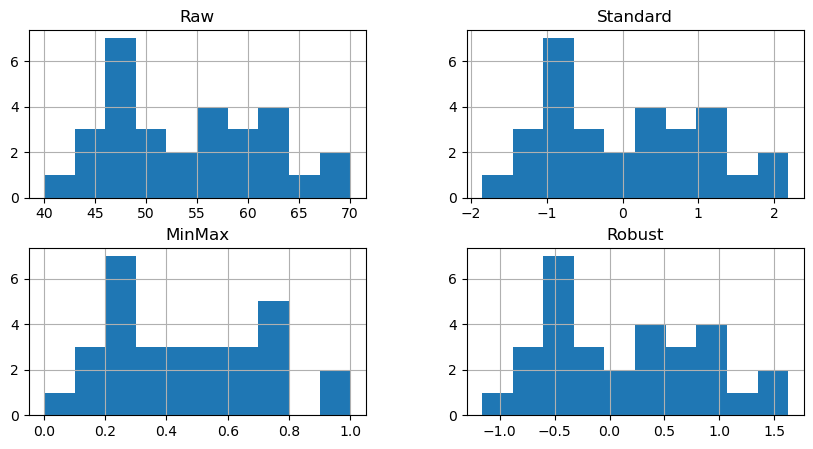

In [58]:
import matplotlib
%matplotlib inline

df_rstpulse[['Raw','Standard','MinMax','Robust']].hist(figsize=(10,5));

### 탐색적 분석

#### 글꼴 설치

In [17]:
import matplotlib.font_manager
import matplotlib
import matplotlib.pyplot as plt
[f.fname for f in matplotlib.font_manager.fontManager.ttflist]
plt.rcParams['font.family'] = 'NanumGothicCoding'
matplotlib.rcParams['axes.unicode_minus'] = False

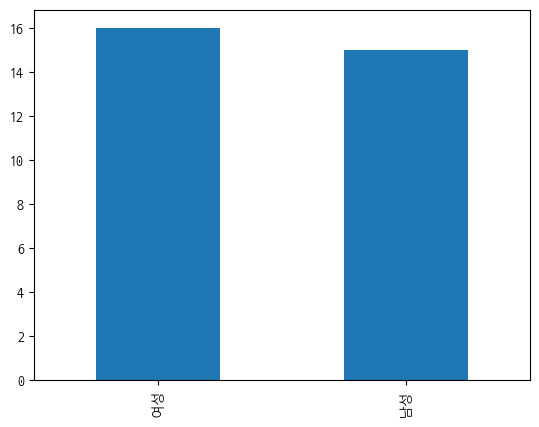

In [18]:
df_count = df_fitness['GENDER'].value_counts()
df_count.plot.bar()
plt.show()

#### 데이터 불러오기

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
matplotlib.__file__

'/home/piai/anaconda3/lib/python3.10/site-packages/matplotlib/__init__.py'

In [6]:
#matplotlib.rc('font', family='Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)

In [7]:
df_fitness = pd.read_csv('/home/piai/바탕화면/실습화일/1 Big Data 분석 기초/FITNESS.csv', encoding = 'euc-kr')
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


In [27]:
df_currency = pd.read_csv('/home/piai/바탕화면/실습화일/1 Big Data 분석 기초/환율.csv', parse_dates = ['APPL_DATE'])
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


#### Bar chart 생성

<Axes: >

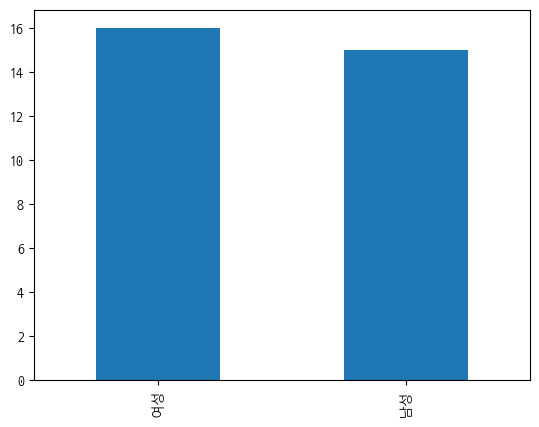

In [13]:
df_count = df_fitness['GENDER'].value_counts()
df_count.plot.bar()

<Axes: >

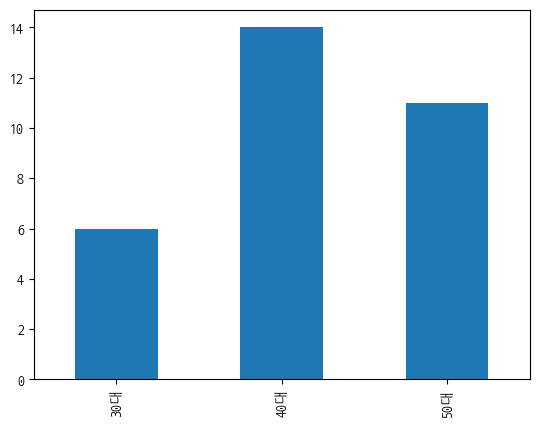

In [25]:
df_count = df_fitness['AGEGROUP'].value_counts()
df_count.sort_index(inplace = True);
df_count.plot.bar()

<Axes: xlabel='GENDER,AGEGROUP'>

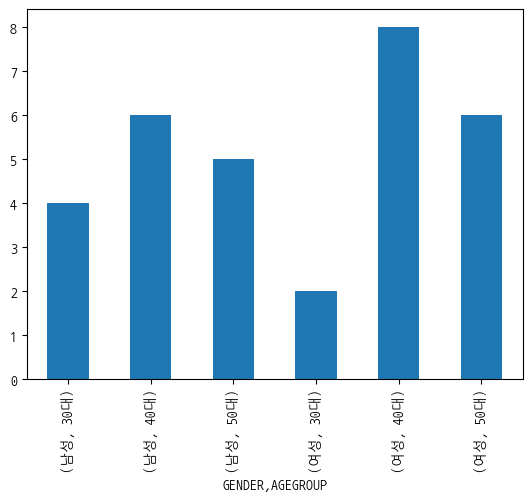

In [20]:
df_groupby_total = df_fitness.groupby(['GENDER','AGEGROUP']).size()
df_groupby_total.plot.bar()

#### Histogram

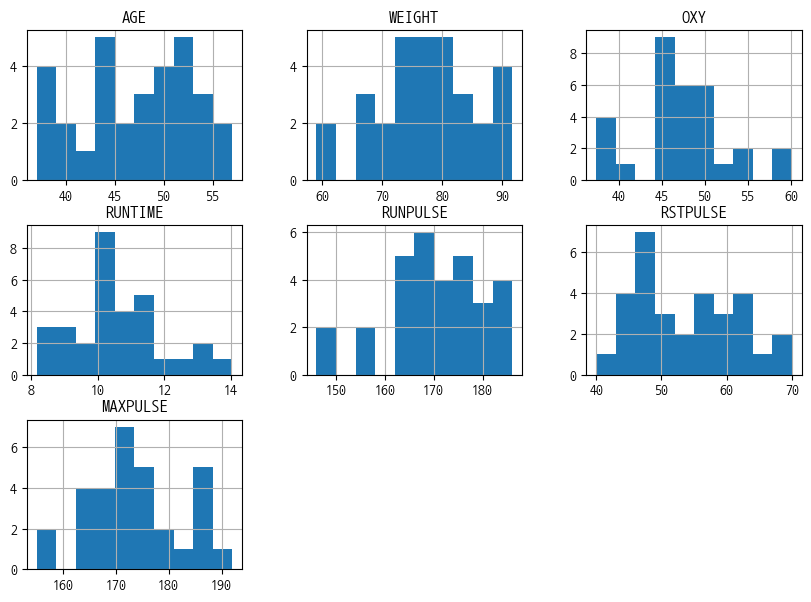

In [22]:
df_fitness.hist(figsize = (10,7));

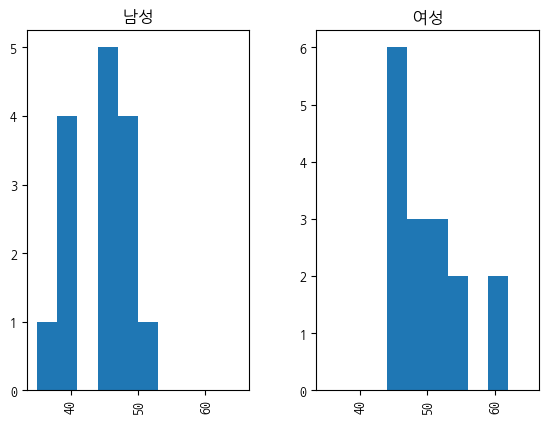

In [24]:
df_fitness.hist(column='OXY', by = 'GENDER' , range=(35,65));

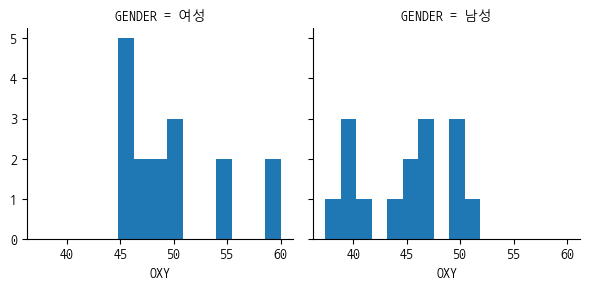

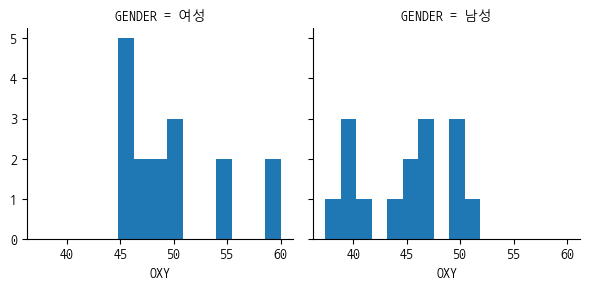

In [37]:
grid = sns.FacetGrid(df_fitness, col = 'GENDER')
grid.map(plt.hist, "OXY")

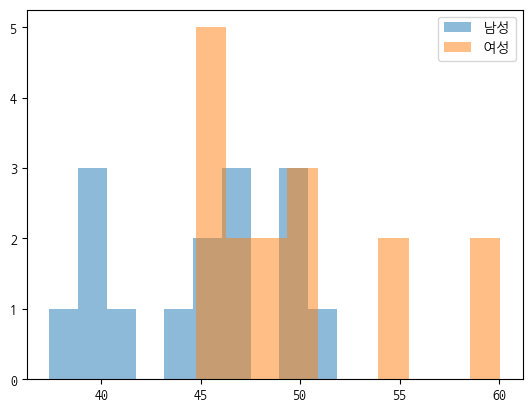

In [39]:
plt.hist(df_fitness[df_fitness["GENDER"] == '남성']['OXY'], label = '남성', alpha = 0.5)
plt.hist(df_fitness[df_fitness["GENDER"] == '여성']['OXY'], label = '여성', alpha = 0.5)
plt.legend()

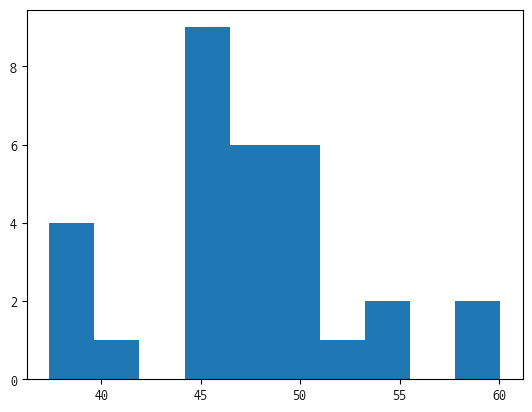

In [41]:
plt.hist(x = 'OXY', data = df_fitness);

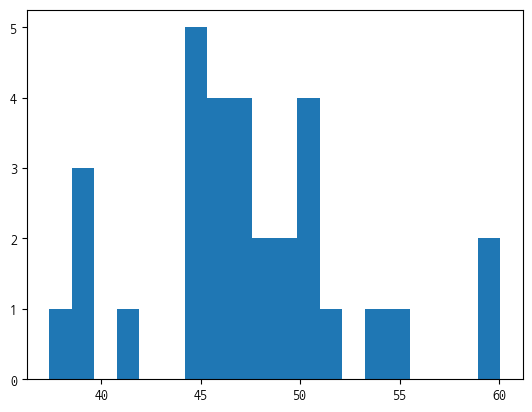

In [42]:
plt.hist(x = 'OXY', data = df_fitness, bins = 20 );

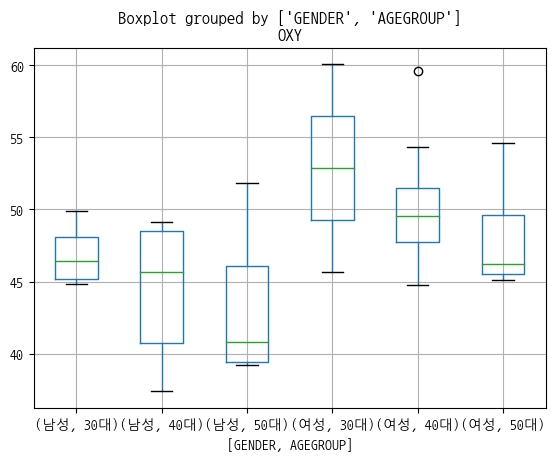

In [44]:
df_fitness.boxplot(column = 'OXY', by = ['GENDER', 'AGEGROUP']);

<Axes: >

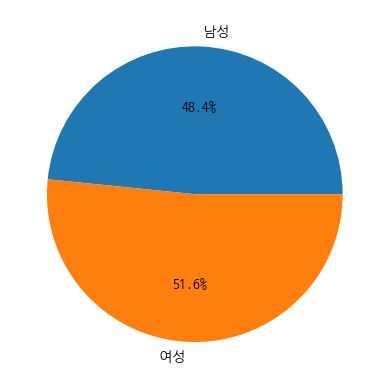

In [46]:
df_count = df_fitness.groupby(['GENDER']).size()
df_count.plot.pie(y = 'OXY', autopct='%.1f%%')

<Axes: xlabel='RUNTIME', ylabel='OXY'>

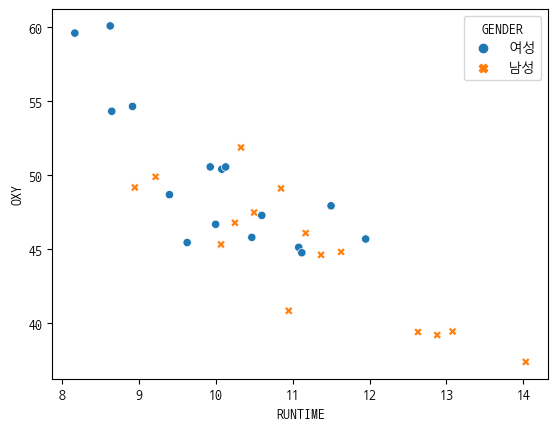

In [47]:
sns.scatterplot(x='RUNTIME', y='OXY', hue = 'GENDER' , style= 'GENDER', data = df_fitness)

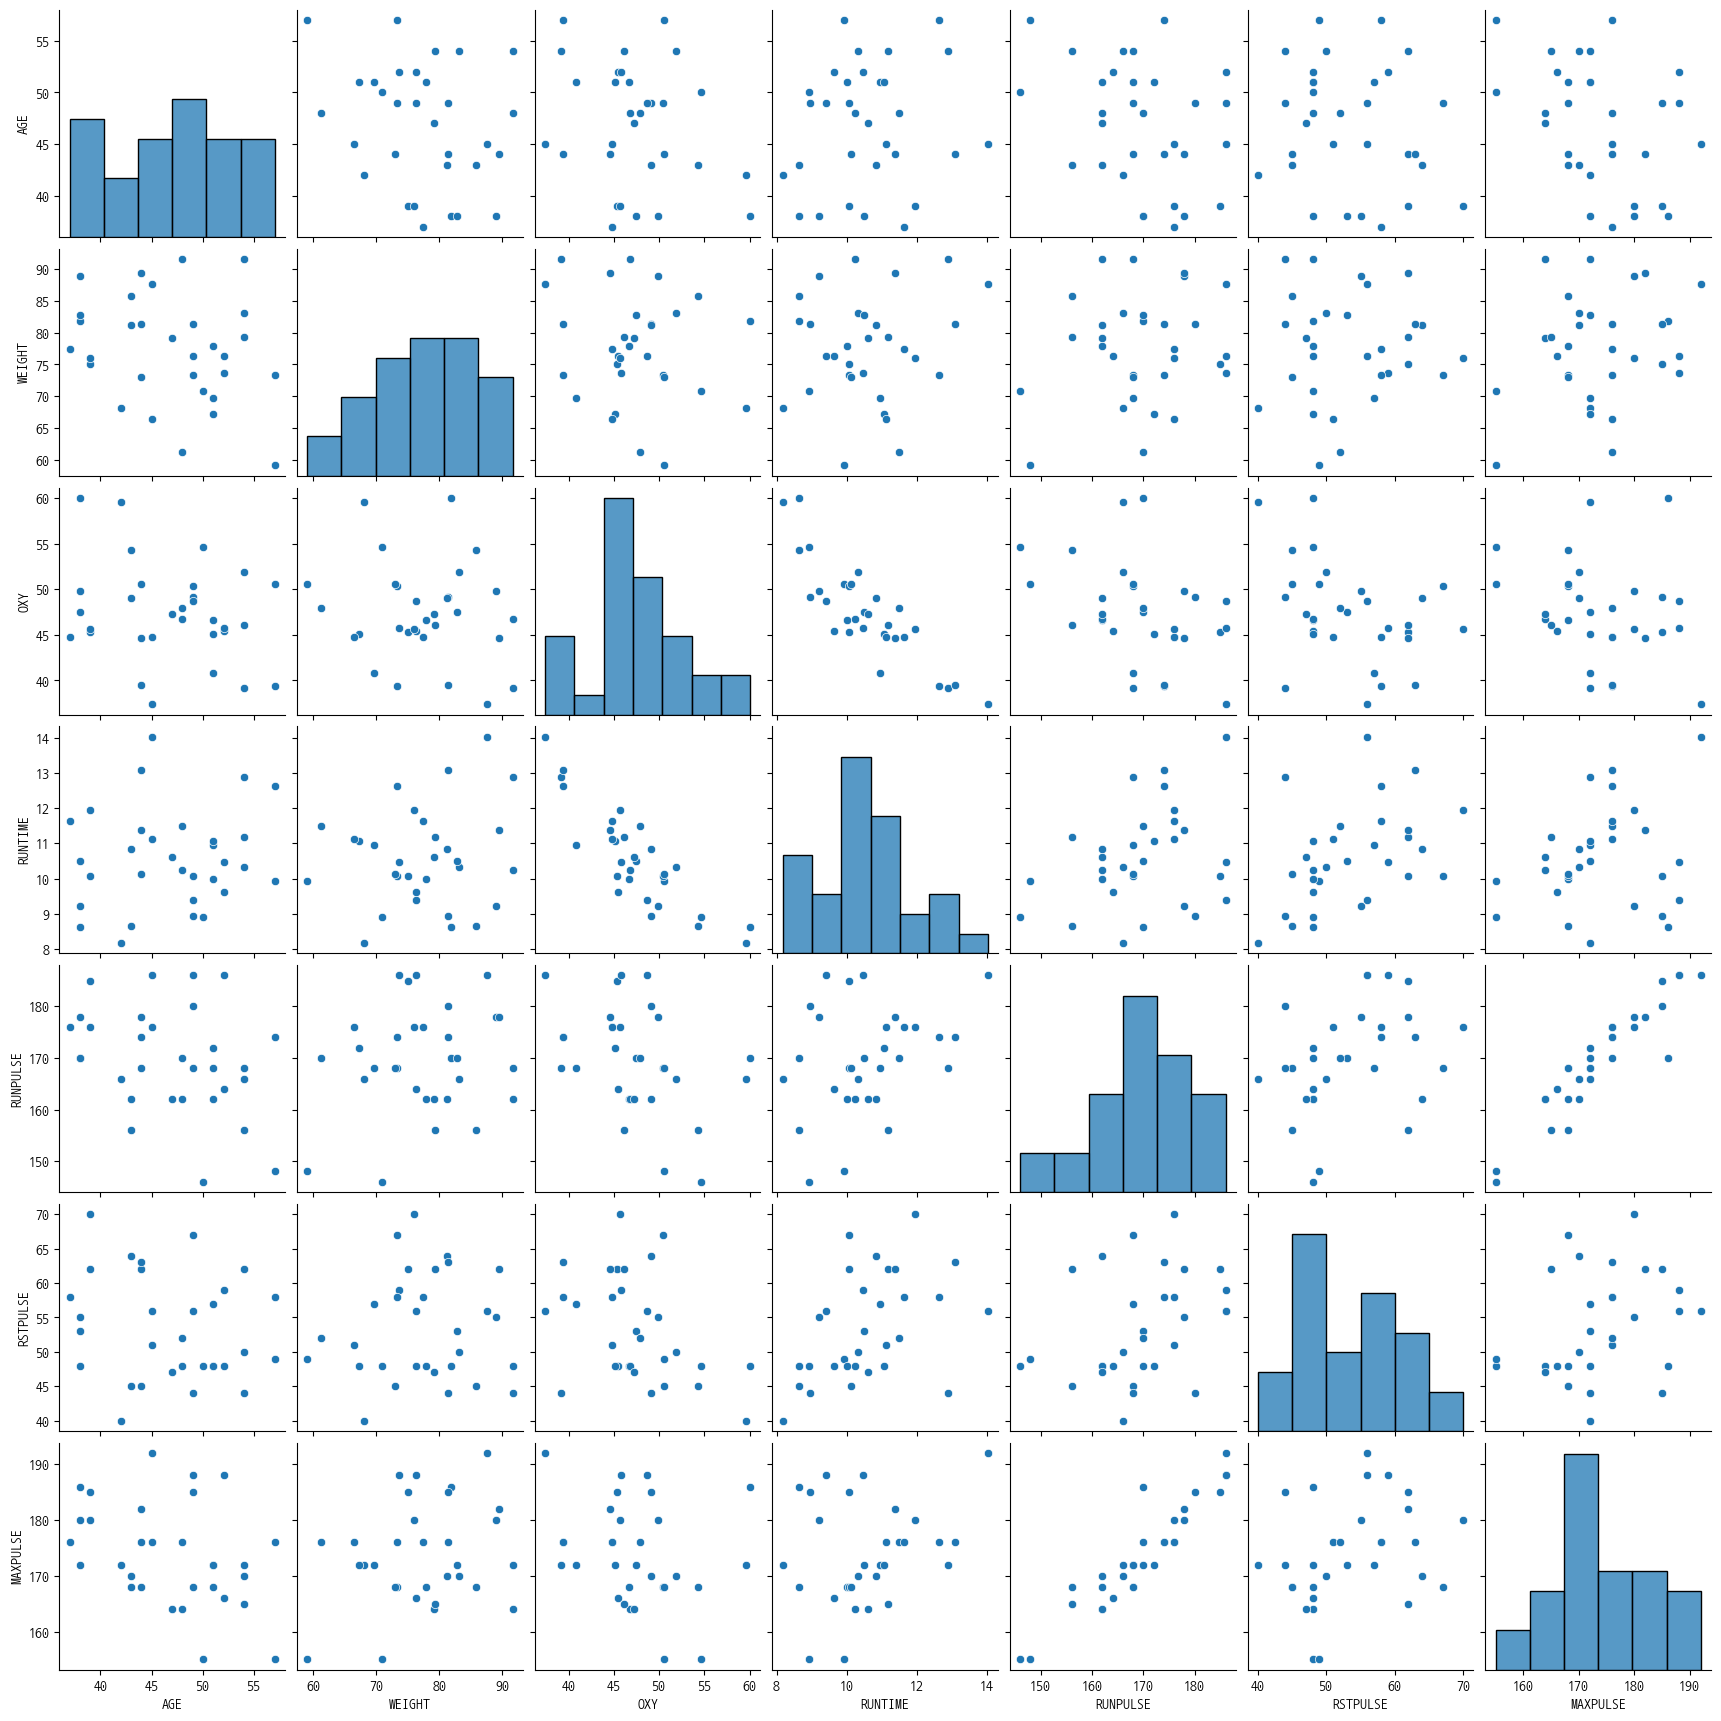

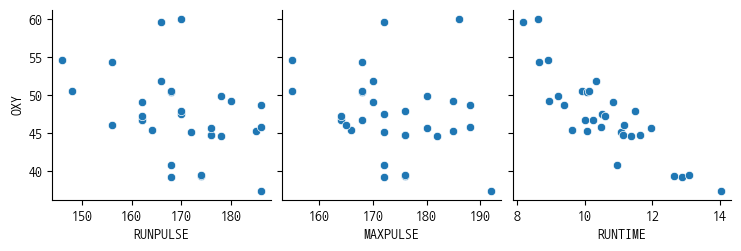

In [49]:
sns.pairplot(df_fitness)
sns.pairplot(df_fitness, y_vars = ['OXY'], x_vars=['RUNPULSE','MAXPULSE','RUNTIME'])

In [50]:
df_currency_pivot = df_currency.pivot(index='APPL_DATE', columns='CURRENCY', values = 'STD_RATE')
df_currency_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0


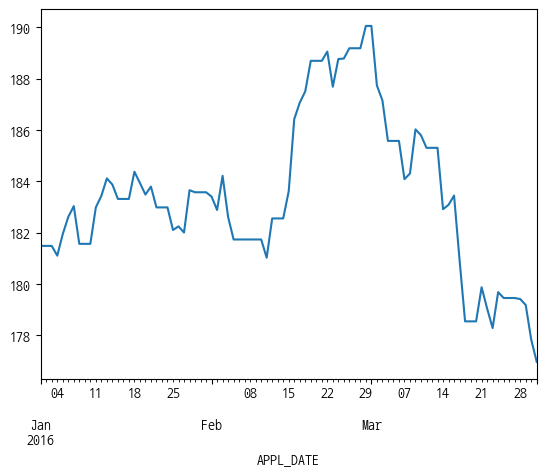

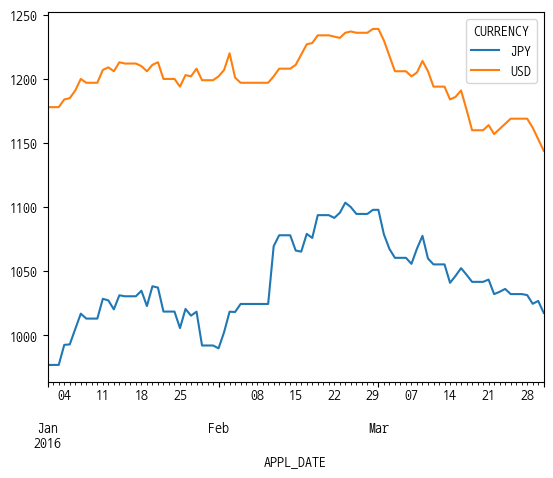

In [54]:
df_currency_pivot['CNY'].plot();
df_currency_pivot[['JPY','USD']].plot();

/tmp/ipykernel_6952/2769312856.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg = df_fitness.groupby(['GENDER', 'AGEGROUP'], as_index = False).agg('mean');
/tmp/ipykernel_6952/2769312856.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_pivot = df_agg.pivot('GENDER','AGEGROUP','OXY');


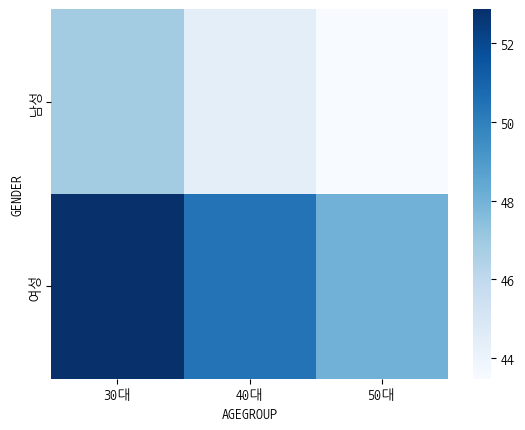

In [60]:
df_agg = df_fitness.groupby(['GENDER', 'AGEGROUP'], as_index = False).agg('mean');
df_pivot = df_agg.pivot('GENDER','AGEGROUP','OXY');
sns.heatmap(df_pivot, cmap='Blues');

/tmp/ipykernel_6952/2273250387.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = df_fitness['RUNTIME'], y = df_fitness['OXY'], shade = False);


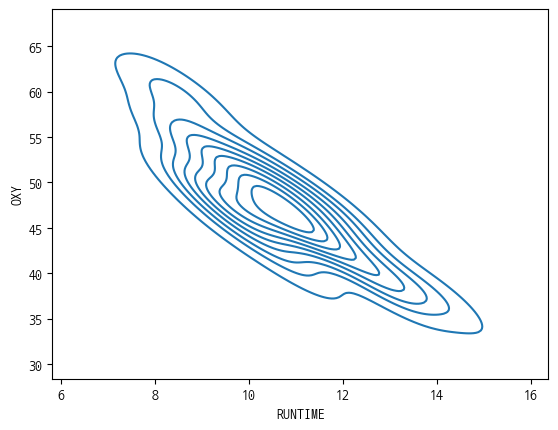

In [65]:
sns.kdeplot(x = df_fitness['RUNTIME'], y = df_fitness['OXY'], shade = False);

<Axes: >

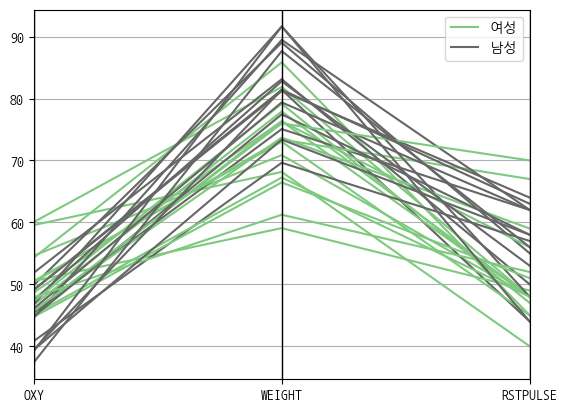

In [66]:
pd.plotting.parallel_coordinates(df_fitness, "GENDER", cols = ['OXY','WEIGHT','RSTPULSE'], colormap = 'Accent')

Text(675.7676767676767, 0.5, '혈당 산소 요구량')

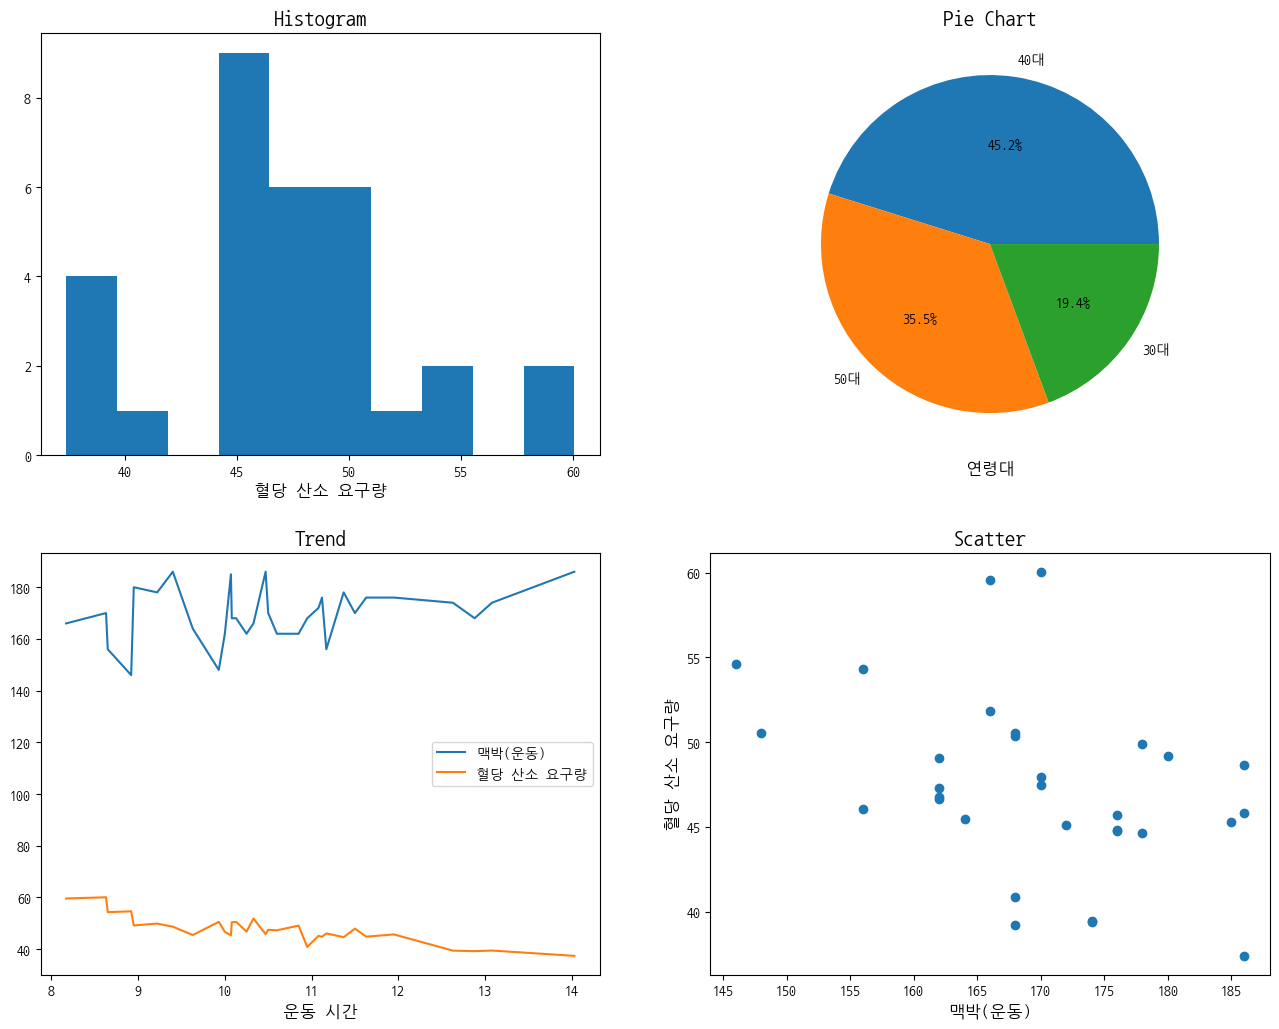

In [109]:
df_count = df_fitness["AGEGROUP"].value_counts()
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (13,10))
plt.tight_layout(w_pad=5, h_pad=5)
# Histogram
axes[0,0].hist(df_fitness['OXY'])
axes[0,0].set_title('Histogram', fontsize = 15)
axes[0,0].set_xlabel('혈당 산소 요구량', fontsize = 12)
# Pie Chart
axes[0,1].pie(df_count, labels = df_count.index.tolist(), autopct = "%.1f%%")
axes[0,1].set_title('Pie Chart', fontsize = 15)
axes[0,1].set_xlabel('연령대', fontsize = 12)
# Trend
axes[1,0].plot('RUNTIME', 'RUNPULSE', data = df_fitness , label = '맥박(운동)')
axes[1,0].plot('RUNTIME', 'OXY', data = df_fitness , label = '혈당 산소 요구량')
axes[1,0].set_title('Trend', fontsize = 15)
axes[1,0].set_xlabel('운동 시간', fontsize = 12)
axes[1,0].legend()
# Scatter
axes[1,1].scatter('RUNPULSE', 'OXY', data = df_fitness)
axes[1,1].set_title('Scatter', fontsize = 15)
axes[1,1].set_xlabel('맥박(운동)', fontsize = 12)
axes[1,1].set_ylabel('혈당 산소 요구량', fontsize = 12)

### 기술 통계

In [72]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [73]:
ds_mycars = pd.read_csv('/home/piai/바탕화면/실습화일/1 Big Data 분석 기초/mycars.csv')
ds_mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [74]:
ds_mycars.describe().round(3)

,displacement,year,cylinder,mpg,highway_mileage
count,234.000,234.00,234.000,234.000,234.000
mean,3.472,2003.50,5.889,16.859,23.440
std,1.292,4.51,1.612,4.256,5.955
min,1.600,1999.00,4.000,9.000,12.000
25%,2.400,1999.00,4.000,14.000,18.000
50%,3.300,2003.50,6.000,17.000,24.000
75%,4.600,2008.00,8.000,19.000,27.000
max,7.000,2008.00,8.000,35.000,44.000


In [75]:
df = ds_mycars[['model','mpg']]
df.groupby('model').describe()

mpg                                                 \
                       count       mean       std   min    25%   50%    75%   
model                                                                         
4runner 4wd              6.0  15.166667  0.752773  14.0  15.00  15.0  15.75   
a4                       7.0  18.857143  1.864454  16.0  18.00  18.0  20.50   
a4 quattro               8.0  17.125000  1.807722  15.0  15.75  17.0  18.25   
a6 quattro               3.0  16.000000  1.000000  15.0  15.50  16.0  16.50   
altima                   6.0  20.666667  1.966384  19.0  19.00  20.0  22.50   
c1500 suburban 2wd       5.0  12.800000  1.303840  11.0  12.00  13.0  14.00   
camry                    7.0  19.857143  1.463850  18.0  18.50  21.0  21.00   
camry solara             7.0  19.857143  1.772811  18.0  18.00  21.0  21.00   
caravan 2wd             11.0  15.818182  1.834022  11.0  15.50  16.0  17.00   
civic                    9.0  24.444444  1.943651  21.0  24.00  24.0  25.00   
corolla                  5.0  25.600000  1.673320  24.0  24.00  26.0  26.00   
corvette                 5.0  15.400000  0.547723  15.0  15.00  15.0  16.00   
dakota pickup 4wd        9.0  12.777778  1.986063   9.0  11.00  14.0  14.00   
durango 4wd              7.0  11.857143  1.573592   9.0  11.00  13.0  13.00   
expedition 2wd           3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
explorer 4wd             6.0  13.666667  0.816497  13.0  13.00  13.5  14.00   
f150 pickup 4wd          7.0  13.000000  1.000000  11.0  13.00  13.0  13.50   
forester awd             6.0  18.833333  0.983192  18.0  18.00  18.5  19.75   
grand cherokee 4wd       8.0  13.500000  2.507133   9.0  12.50  14.0  15.00   
grand prix               5.0  17.000000  1.000000  16.0  16.00  17.0  18.00   
gti                      5.0  20.000000  2.000000  17.0  19.00  21.0  21.00   
impreza awd              8.0  19.625000  0.744024  19.0  19.00  19.5  20.00   
jetta                    9.0  21.222222  4.867694  16.0  19.00  21.0  21.00   
k1500 tahoe 4wd          4.0  12.500000  1.732051  11.0  11.00  12.5  14.00   
land cruiser wagon 4wd   2.0  12.000000  1.414214  11.0  11.50  12.0  12.50   
malibu                   5.0  18.800000  1.923538  17.0  18.00  18.0  19.00   
maxima                   3.0  18.666667  0.577350  18.0  18.50  19.0  19.00   
mountaineer 4wd          4.0  13.250000  0.500000  13.0  13.00  13.0  13.25   
mustang                  9.0  15.888889  1.452966  14.0  15.00  15.0  17.00   
navigator 2wd            3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
new beetle               6.0  24.000000  6.511528  19.0  20.00  20.5  27.00   
passat                   7.0  18.571429  1.902379  16.0  17.50  18.0  20.00   
pathfinder 4wd           4.0  13.750000  1.258306  12.0  13.50  14.0  14.25   
ram 1500 pickup 4wd     10.0  11.400000  1.505545   9.0  11.00  11.5  12.75   
range rover              4.0  11.500000  0.577350  11.0  11.00  11.5  12.00   
sonata                   7.0  19.000000  1.414214  18.0  18.00  18.0  20.00   
tiburon                  7.0  18.285714  1.603567  16.0  17.00  19.0  19.50   
toyota tacoma 4wd        7.0  15.571429  0.786796  15.0  15.00  15.0  16.00   

                              
                         max  
model                         
4runner 4wd             16.0  
a4                      21.0  
a4 quattro              20.0  
a6 quattro              17.0  
altima                  23.0  
c1500 suburban 2wd      14.0  
camry                   21.0  
camry solara            22.0  
caravan 2wd             18.0  
civic                   28.0  
corolla                 28.0  
corvette                16.0  
dakota pickup 4wd       15.0  
durango 4wd             13.0  
expedition 2wd          12.0  
explorer 4wd            15.0  
f150 pickup 4wd         14.0  
forester awd            20.0  
grand cherokee 4wd      17.0  
grand prix              18.0  
gti                     22.0  
impreza awd             21.0  
jetta     

In [76]:
ds_Exh_QC1 = pd.read_csv('/home/piai/바탕화면/실습화일/1 Big Data 분석 기초/EXH_QC1.csv')
df = ds_Exh_QC1[['Flaws','Period']]

In [102]:
df

,Flaws,Period
0,Scratch,Day
1,Scratch,Day
2,Peel,Day
3,Peel,Day
4,Smudge,Day
5,Scratch,Day
6,Other,Day
7,Other,Evening
8,Peel,Evening
9,Peel,Evening


In [103]:
count = df['Flaws'].value_counts().sort_index()
count

Other       6
Peel       15
Scratch    13
Smudge      6
Name: Flaws, dtype: int64

In [105]:
# count 누적 해줌
cumcnt = np.cumsum(count)
cumcnt

Other       6
Peel       21
Scratch    34
Smudge     40
Name: Flaws, dtype: int64

In [107]:
# 전체 비율의 percent
percent = count/sum(count)*100
percent

Other      15.0
Peel       37.5
Scratch    32.5
Smudge     15.0
Name: Flaws, dtype: float64

In [93]:
cumpct = np.cumsum(percent)

In [94]:
count_data = pd.DataFrame({'Count':count , 'CumCnt': cumcnt , 'Percent' : percent , 'CumPct' : cumpct})

In [95]:
count_data.columns.name = 'Flaws'

In [96]:
count_data

Flaws,Count,CumCnt,Percent,CumPct
Other,6,6,15.0,15.0
Peel,15,21,37.5,52.5
Scratch,13,34,32.5,85.0
Smudge,6,40,15.0,100.0


### 확률분포

In [98]:
mu = 115
sigma = 20
x = 135
prob = stats.norm.cdf(x,mu,sigma)
print('{0}분 이상걸리는 A/S 작업 비율 : {1:.1f}%'.format(x,(1-prob)*100))

135분 이상걸리는 A/S 작업 비율 : 15.9%


In [101]:
mu = 12
sigma = 3
x1 = 15
prob1 = stats.norm.cdf(x,mu,sigma)
print('{0}km 이상 {1}km 이하를 달릴 확률은 : {2:.3f}에 해당함'.format(mu,x1,(prob1-0.5)))

12km 이상 15km 이하를 달릴 확률은 : 0.341에 해당함
